In [3]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [22]:
import infercnvpy as cnv

# Compare CNV clusters to histopathological annotations (or *ROI_status*)

## Read in dataset

In [5]:
adata = sc.read(os.path.expanduser("~/SSS_mount/insituCNV/data/WTx-CosMx_TVA/round2/221/CosMx_221_common_CNVinf.h5ad"))

In [6]:
adata

AnnData object with n_obs × n_vars = 347023 × 14044
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_local_px', 'CenterY_local_px', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68_CK8_18', 'Max.CD68_CK8_18', 'Mean.CD298_B2M', 'Max.CD298_B2M', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'Dash', 'ISH.concentration', 'Panel', 'Run_Tissue_name', 'Run_name', 'assay_type', 'dualfiles', 'tissue', 'version', 'slide_ID', 'CenterX_global_px', 'CenterY_global_px', 'cell_ID', 'unassignedTranscripts', 'median_RNA', 'RNA_quantile_0.75', 'RNA_quantile_0.8', 'RNA_quantile_0.85', 'RNA_quantile_0.9', 'RNA_quantile_0.95', 'RNA_quantile_0.99', 'nCount_RNA', 'nFeature_RNA', 'median_negprobes', 'negprobes_quantile_0.75', 'negprobes_quantile_0.8', 'negprobes_quantile_0.85', 'negprobes_quantile_0.9', 'negprobes_quantile_0.95', 'negprobes_quantile_0.99', 'nCount_negprobes', 'nFeature_negprobes', 'median_falsecode', 'falsecode_quantile_0.75', 'falsecode_quantile_0.8', 'falsecode_quantil

## CNV clusters vs ROI status

In [7]:
# Filter out the 'non-epi' cluster
adata = adata[adata.obs['epi_cnv_leiden_res0.1'] != 'non-epi']

In [11]:
# Check the contents of the cnv_leiden_labels and cnv_leiden_colors
print("cnv_leiden_labels:", cnv_leiden_labels)
print("cnv_leiden_colors keys:", cnv_leiden_colors.keys())


cnv_leiden_labels: ['0', '1', '2', '3']
cnv_leiden_colors keys: dict_keys(['0.0', '1.0', '2.0', '3.0', '4.0'])


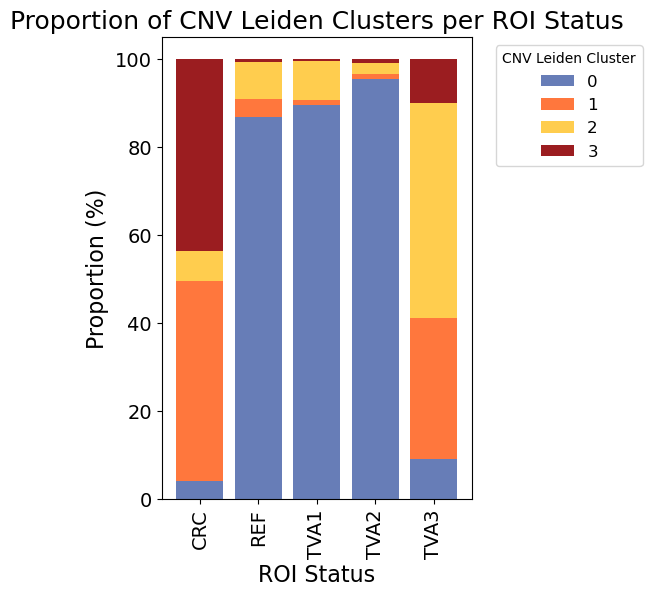

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# CNV cluster colors
cnv_leiden_colors = {
    '0': '#677DB7',  # Cluster 0
    '1': '#FF773D',  # Cluster 1
    '2': '#FFCD4E',  # Cluster 2
    '3': '#9B1D20',  # Cluster 3
}


# Create contingency table (counts of CNV clusters per ROI_status)
ct = pd.crosstab(adata.obs['ROI_status'], adata.obs['epi_cnv_leiden_res0.1'].astype(str))  # Ensure clusters are treated as strings

# Normalize within each ROI status
ct_norm = ct.div(ct.sum(axis=1), axis=0) * 100

# Get CNV Leiden cluster labels in the same order as in the contingency table
cnv_leiden_labels = ct_norm.columns.tolist()

# Plot as a stacked bar plot with correct colors from the dictionary
ct_norm.plot(
    kind="bar",
    stacked=True,
    color=[cnv_leiden_colors[str(cluster)] for cluster in cnv_leiden_labels],  # Access colors from the dictionary using string keys
    figsize=(4, 6),
    width=0.8
)

# Labels and title
plt.ylabel("Proportion (%)", fontsize=16)
plt.xlabel("ROI Status", fontsize=16)
plt.title("Proportion of CNV Leiden Clusters per ROI Status", fontsize=18)
plt.legend(title="CNV Leiden Cluster", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('prop_of_clones_per_ROI_status.pdf')
plt.show()